In [4]:

from IPython.utils import io
from google.colab import files

import platform, sys
python_version=platform.python_version()
from distutils.version import LooseVersion, StrictVersion


with io.capture_output() as captured:
  if ( LooseVersion(python_version) < LooseVersion("3.0.0")):
      print("Python3 is needed!");
      print("How to fix: Runtime/Change_runtime_type/Python 3");
      sys.exit()
      
  try:
      from dolfin import *; from mshr import *
  except ImportError as e:
      !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
      !add-apt-repository -y ppa:fenics-packages/fenics
      !apt-get update -qq
      !apt install -y --no-install-recommends fenics
      from dolfin import *; from mshr import *
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil

dolfin_version = dolfin.__version__
print ('dolfin version:', dolfin_version)

!rm -rf * # clean up all files
# Useful commands
# Remove an empty folder      : os.rmdir("my_results")
# Remove a folder with files  : shutil.rmtree("results")
# Make a folder               : os.mkdir("my_results")
# Runtime/Change_runtime_type/Python3







dolfin version: 2019.1.0


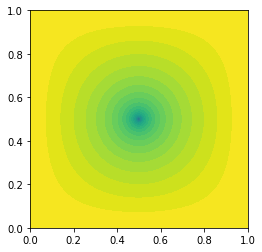

In [14]:
import sys
from dolfin import *



## Problem data
E0 = Constant(0.0)
n = Constant(1.0)
k = Constant(2.0)  # 2.4 GHz / c

## Formulation
mesh = UnitSquareMesh(1000, 1000)
V = FunctionSpace(mesh, "Lagrange", 1)

E = TrialFunction(V)
v = TestFunction(V)

# Boundary conditions
point = Point(0.5, 0.5)
f = PointSource(V, point,1.0)

def E0_boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, E0, E0_boundary)

# Equation
a = ((k**2 / n**2) * inner(E, v) - inner(nabla_grad(E), nabla_grad(v))) * dx
L = Constant(0.0) * v * dx

# Assemble system
A, rhs = assemble_system(a, L, bc)
f.apply(rhs)

# Solve system
E = Function(V)
E_vec = E.vector()
solve(A, E_vec, rhs)

# Plot and export solution
import matplotlib.pyplot as plt 
plot(E)
plt.show()

file = File("helmhurts.pvd")
file << E

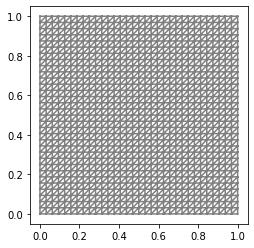

In [15]:
mesh1=UnitSquareMesh(32,32)
plot(mesh1)

In [38]:
V1=FunctionSpace(mesh1,"CG",1) #linear elements

omega=2.0
k1=cos(pi/6)
k2=sin(pi/6)
u_D = Expression('cos(omega*2*pi*(k1*x[0]+k2*x[1]))', omega=omega, k1=k1, k2=k2, degree=2)  
def boundary(x, on_boundary): 
    return on_boundary

bc1 = DirichletBC(V, u_D, boundary)  #u(x,y)=cos(2*pi*x) cos(2*pi*y)
f1=(4*pi*pi*omega**2)*u_D                   #f(x,y)=1+8.0*pi^2*u(x,y)

In [39]:
u = TrialFunction(V)
v1 = TestFunction(V)

a = (dot(grad(v1), grad(u)) + v1 * u) * dx
L = f1 * v1 * dx

0:00:17.894644


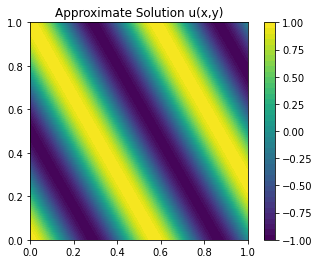

In [40]:
from datetime import datetime


# Compute solution
u = Function(V)

startTime = datetime.now()
solve(a == L, u, bc1)

endTime = datetime.now()

# Plot solution and mesh
p=plot(u,  title="Approximate Solution u(x,y)")

plt.colorbar(p)

#plot(mesh)
print(endTime-startTime)

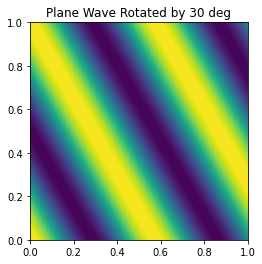

In [41]:
u_e0=Expression('cos(omega*2*pi*(k1*x[0]+k2*x[1]))', omega=omega, k1=k1, k2=k2, degree=2)
F=interpolate(u_e0,V)
plot(F, title="Plane Wave Rotated by 30 deg") #same as approximate solution nice!